# <center> <b>About Author</b></center>
- Project: <b>IMDB Dataset 2023</b> \
       <i> <b> <font size=8>  Introduction: </font></b></i>
       <p>Hi, everyone! \
       My name is Mohsin Shareef, I'm glad to introduce myself to you. \
       I am a Junior Data Scientist passionate about leveraging data to derive meaningful insights and drive impactful decisions. \
       I regularly upload my data analysis notebooks and projects on Kaggle. \
       I showcase my skills in data manipulation, exploratory data analysis
       </p>
       <i> <b> <font size=7> Contact Info: </font></b></i>
       <p>I happy to say, I am always available to you for any collaboration and network building. \
       You connect with me any time on kaggle and other professsional platforms to discuss about data science. \
       - [Kaggle](https://www.kaggle.com/mohsin31202) \
       - [Github](https://github.com/MohsinShareef)  \
       - <i>Email:</i><b> mohsinshareef822@gmail.com </b></p>

## <center> <b> About Dataset </b></center>
<p>Dataset containing information about movies which appears on IMDB website. <br>
Data was obtained by means of a web scraping in Python and combined with repository shared by IMDB. Data was preprocessed to include only movies which were released after 1970 and currently have over 50 000 ratings. Additionally there were selected only these movies whose budgets and gross' are denominated in USD to avoid discrepancies. <br>
Dataset contains 3348 observations described by 12 attributes.</p>

- Attributes.
1. id - movie's ID used by IMDB reposito.
2.  primaryTitle - title in English.
3.  originalTitle - original title in native language.
4.  isAdult - parental guidance.
5.  runtimeMinutes - total runtime in minutes.
6.  genres - genres.
7.  averageRating - final rating, based on all the ratings.
8.  numVotes - total number of votes (ratings).
9.  budget - total budget in USD.
10. gross - total gross worldwide in USD.
11. release_date - release date, first occurrence.
12. directors - directors.

## <center>Import Liraries<center>

In [72]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns
pd.set_option('display.max_columns', None)

# display all rows
pd.set_option('display.max_rows', None)

# display plots in the notebook
%matplotlib inline

# set default plot size
plt.rcParams['figure.figsize'] = (10, 5)

# load data from kaggle 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 


## Load the dataset
- Create the dataframe (df)

In [2]:
#df=pd.read_csv("/kaggle/input/imdb-dataset-2023/imdb_data.csv")
df = pd.read_csv('data\imdb_data.csv')

# <center> Let's Start Data Wrangling </center>
- Top of the dataset

In [3]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


- Check the shape of the dataframe.

In [4]:
df.shape

(3348, 12)

- Get basic information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


- Summary of Dataframe.

In [6]:
df.describe()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross
count,3348.0,3348.000000,3348.00000,3.348000e+03,3.348000e+03,3.297000e+03
mean,0.0,112.739845,6.73853,2.155492e+05,5.039280e+07,1.681599e+08
std,0.0,19.927703,0.88221,2.480211e+05,5.178614e+07,2.366507e+08
min,0.0,63.000000,1.00000,5.000400e+04,1.800000e+01,2.100000e+02
25%,0.0,98.000000,6.20000,7.897700e+04,1.500000e+07,3.623022e+07
50%,0.0,109.000000,6.80000,1.290400e+05,3.200000e+07,8.821516e+07
75%,0.0,124.000000,7.30000,2.468495e+05,6.800000e+07,2.008117e+08
max,0.0,242.000000,9.30000,2.817283e+06,3.560000e+08,2.923706e+09


In [7]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

### Obervation Set 1:-
- The Dataframe have 12 columns/attributes.
- The Dataframe have 3348 rows/entries.
- The Daraframe have 6 object columns and 6 numaric columns.
- `release_date` column change the data type.
- Upgrade columns name with the help of feature engineering.
- `inAdult` column have all values 0.0 according to descriptive statistics.
- The columns name are: 
  -  ['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
  -  'genres', 'averageRating', 'numVotes', 'budget', 'gross',
  -   'release_date', 'directors']

- Change the columns names. 

In [8]:

df.rename(columns = {'id':'Id','primaryTitle':'Primary Title', 'originalTitle':'Original Title', 'isAdult':'Adult', 'runtimeMinutes':'Duration', 'genres':'Genre', 'averageRating':'Rating', 'numVotes':'Votes', 'budget':'Budget', 'gross':'Gross', 'release_date':'Release Date', 'directors':'Director'}, inplace = True)

In [9]:
df.columns

Index(['Id', 'Primary Title', 'Original Title', 'Adult', 'Duration', 'Genre',
       'Rating', 'Votes', 'Budget', 'Gross', 'Release Date', 'Director'],
      dtype='object')

In [10]:
df[df['Release Date'].isnull()].head()

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
465,tt0107048,Groundhog Day,Groundhog Day,0,101,"Comedy,Drama,Fantasy",8.0,666512,14600000,71108591.0,NaN,Harold Ramis
524,tt0110932,Quiz Show,Quiz Show,0,133,"Biography,Drama,History",7.5,72316,31000000,24822619.0,NaN,Robert Redford
1190,tt0307453,Shark Tale,Shark Tale,0,90,"Adventure,Animation,Comedy",6.0,194771,75000000,374583879.0,NaN,"Bibo Bergeron, Vicky Jenson, Rob Letterman"
1298,tt0348333,Waiting...,Waiting...,0,94,Comedy,6.7,103903,3000000,18637690.0,NaN,Rob McKittrick
2876,tt2649554,Midnight Special,Midnight Special,0,112,"Drama,Mystery,Sci-Fi",6.6,83229,18000000,7112282.0,NaN,Jeff Nichols


In [11]:
# Release Date convert to datetime
df[df['Release Date']=='1977'].head()

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
61,tt0075784,A Bridge Too Far,A Bridge Too Far,0,175,"Drama,History,War",7.4,60220,27000000,50750000.0,1977,Richard Attenborough


In [12]:
import datetime

date_str = '1977'
date_obj = datetime.datetime.strptime(date_str, '%Y')

formatted_date = date_obj.strftime('%B %d, %Y')

df.loc[df['Release Date'] == date_str, 'Release Date'] = formatted_date

# <center> Check missing values of this dataset. </center>

In [13]:
df.isnull().sum().sort_values(ascending=False)

Gross             51
Release Date       5
Id                 0
Primary Title      0
Original Title     0
Adult              0
Duration           0
Genre              0
Rating             0
Votes              0
Budget             0
Director           0
dtype: int64

In [14]:

df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [15]:

df['Release Date'] = df['Release Date'].fillna(df['Release Date'].mode()[0])

In [16]:
df.isnull().sum().sort_values(ascending=False)

Id                0
Primary Title     0
Original Title    0
Adult             0
Duration          0
Genre             0
Rating            0
Votes             0
Budget            0
Gross             0
Release Date      0
Director          0
dtype: int64

# <center>Check the duplicates values. </center>

In [17]:
print(df.duplicated().sum())
print(df['Id'].duplicated().sum())
print(df['Primary Title'].duplicated().sum())

0
0
53


In [18]:
df[df['Primary Title'].duplicated()].head(2)

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
1157,tt0293429,Mortal Kombat,Mortal Kombat,0,110,"Action,Adventure,Fantasy",6.0,185852,55000000,84426031.0,April 2021,Simon McQuoid
1338,tt0363547,Dawn of the Dead,Dawn of the Dead,0,101,"Action,Horror",7.3,267147,26000000,102278712.0,2004,Zack Snyder


In [19]:
df[df['Primary Title']=='Mortal Kombat']


,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
580,tt0113855,Mortal Kombat,Mortal Kombat,0,101,"Action,Adventure,Fantasy",5.8,122989,18000000,122195920.0,"July 13, 1995",Paul W.S. Anderson
1157,tt0293429,Mortal Kombat,Mortal Kombat,0,110,"Action,Adventure,Fantasy",6.0,185852,55000000,84426031.0,April 2021,Simon McQuoid


In [20]:
df[df['Primary Title']=='Dawn of the Dead']

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
68,tt0077402,Dawn of the Dead,Dawn of the Dead,0,127,"Horror,Thriller",7.8,126456,650000,159822.0,"September 1, 1978",George A. Romero
1338,tt0363547,Dawn of the Dead,Dawn of the Dead,0,101,"Action,Horror",7.3,267147,26000000,102278712.0,2004,Zack Snyder


# <center> Let's Start Exploratory Data Analysis. </center>
- Explore the data to gain insights

In [21]:
print(df['Primary Title'].nunique())
print(df['Original Title'].nunique())

3295
3298


In [22]:
print(df['Adult'].unique())

[0]


In [23]:
print(df['Rating'].unique())
print(df['Rating'].nunique())

[6.4 7.1 7.6 7.4 7.9 6.6 8.3 6.5 7.7 8.  7.8 9.2 8.1 6.7 7.2 7.5 7.  6.9
 8.2 9.  8.7 7.3 6.8 8.6 5.8 8.5 8.4 6.2 6.1 5.6 5.1 5.  5.9 6.3 6.  5.4
 5.7 3.7 5.5 5.3 4.7 4.1 8.8 8.9 9.3 4.  4.9 3.8 4.6 3.6 5.2 3.9 4.2 4.5
 2.5 4.4 4.8 2.6 3.4 4.3 2.3 2.8 3.5 2.4 3.3 1.9 1.7 1. ]
68


In [24]:
print(df['Genre'].unique())
print(df['Genre'].nunique())

['Comedy,Fantasy,Romance' 'Adventure,Animation,Comedy'
 'Adventure,Comedy,War' 'Comedy,Drama,War' 'Biography,Drama,War'
 'Drama,Sci-Fi,Thriller' 'Crime,Sci-Fi' 'Action,Adventure,Thriller'
 'Action,Crime,Thriller' 'Action,Crime,Drama' 'Comedy,Drama,Romance'
 'Drama,Romance' 'Crime,Drama,Thriller' 'Family,Fantasy,Musical'
 'Action,Adventure,Biography' 'Drama,Music,Musical'
 'Adventure,Drama,Thriller' 'Crime,Drama' 'Drama,Mystery,Western'
 'Comedy,Drama' 'Drama,Horror,Mystery' 'Horror' 'Comedy,Crime,Drama'
 'Biography,Crime,Drama' 'Crime,Mystery,Sci-Fi' 'Action,Drama,Sci-Fi'
 'Horror,Mystery,Thriller' 'Comedy,Western' 'Drama,Mystery,Thriller'
 'Comedy' 'Adventure,Drama,War' 'Adventure,Mystery,Thriller'
 'Adventure,War' 'Drama' 'Comedy,Horror,Musical' 'Crime,Mystery,Thriller'
 'Drama,History,Thriller' 'Horror,Mystery' 'Fantasy,Horror'
 'Action,Adventure,Sci-Fi' 'Western' 'Drama,Sport' 'Comedy,Romance'
 'Drama,History,War' 'Drama,Sci-Fi' 'Drama,Music'
 'Action,Adventure,Comedy' 'Action,Adve

In [25]:
print(df['Director'].unique())
print(df['Director'].nunique())

['James Mangold' 'Wolfgang Reitherman' 'Brian G. Hutton' ...
 'Reinaldo Marcus Green' 'Chandra Prakash Dwivedi' 'Shaka King']
1356


# <center> Let's start find the patterns and insight. </center>

### Q1. Find the top 5 genres with the highest number of movies.?
### Q2. Find the top 5 directors who have directed the most number of movies.?
### Q3 - Which movie has the longest duration.?
### Q4. Which movie has the highest rating.?
### Q5. Which genre has the highest rating.?
### Q6. Which movie has the highest gross.?
### Q7. Which director has the highest gross.?
### Q8. What is the movie with the highest budget.?
### Q9. What is the movie with the lowest budget.?
### Q10. Which director has the highest rating.?

In [26]:
df.head()

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


### Q1. Find the top 5 genres with the highest number of movies.?

In [27]:
top_5_genre = df['Genre'].value_counts().sort_values(ascending=False).head()
top_5_genre.reset_index().rename(columns = {'index':'Genre', 'Genre':'Genre'})


,Genre,count
0,"Action,Adventure,Sci-Fi",129
1,"Comedy,Drama,Romance",121
2,"Adventure,Animation,Comedy",113
3,Comedy,102
4,"Action,Adventure,Comedy",101


In [28]:
fig = px.bar(x=top_5_genre.index, y=top_5_genre.values)
fig.update_layout(title='Top 5 Genres', xaxis_title='Genre', yaxis_title='Count')
fig.show()

<center><b>Figure 1.</b>- Highest Rank of Genres</center>

### Q2. Find the top 5 directors who have directed the most number of movies.?

In [29]:
top_5_director = df['Director'].value_counts().sort_values(ascending=False).head()
top_5_director.reset_index().rename(columns = {'index':'Director', 'Director':'Director'})

,Director,count
0,Steven Spielberg,30
1,Ridley Scott,23
2,Martin Scorsese,21
3,Clint Eastwood,20
4,Ron Howard,19


In [30]:
fig = px.bar(x=top_5_director.index, y=top_5_director.values)
fig.update_layout(title='Top 5 Directors', xaxis_title='Director', yaxis_title='Count')
fig.show()

<center><b>Figure 2.</b>- Highest Rank of Director</center>

### Q3 - Which movie has the longest duration.?

In [31]:
top_5_duration = df.nlargest(5, 'Duration')
top_5_duration = top_5_duration[['Primary Title', 'Duration']].reset_index()
top_5_duration

,index,Primary Title,Duration
0,2216,Zack Snyder's Justice League,242
1,176,Once Upon a Time in America,229
2,1047,Kabhi Khushi Kabhie Gham...,210
3,2269,The Irishman,209
4,3170,Killers of the Flower Moon,206


In [32]:
fig = px.bar(x=top_5_duration['Primary Title'], y=top_5_duration['Duration'])
fig.update_layout(title='Longest Duration Movie', xaxis_title='Primary Title', yaxis_title='Duration')
fig.show()

<center><b>Figure 3.</b>- Longest Time Duration </center>

### Q4. Which movie has the highest rating.?

In [33]:
# highest movies rating
high_rating_movies =df.groupby('Primary Title')['Rating'].max().sort_values(ascending=False).head()
high_rating_movies.reset_index().rename(columns = {'index':'Primary Title', 'Rating':'Rating'})

,Primary Title,Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,Schindler's List,9.0
4,The Lord of the Rings: The Return of the King,9.0


In [34]:
fig = px.bar(x=high_rating_movies.index, y=high_rating_movies.values)
fig.update_layout(title='Highest Rating Movies', xaxis_title='Primary Title', yaxis_title='Rating')
fig.show()

<center><b>Figure 4.</b>- High Rating movies</center>

### Q5. Which genre has the highest rating.?

In [35]:
high_rated_genre =df.groupby('Genre')['Rating'].max().sort_values(ascending=False).head()
high_rated_genre.reset_index().rename(columns = {'index':'Genre', 'Rating':'Rating'})


,Genre,Rating
0,Drama,9.3
1,"Crime,Drama",9.2
2,"Biography,Drama,History",9.0
3,"Action,Adventure,Drama",9.0
4,"Action,Crime,Drama",9.0


In [36]:
fig = px.bar(x=high_rated_genre.index, y=high_rated_genre.values)
fig.update_layout(title='Highest Rating Genre', xaxis_title='Genre', yaxis_title='Rating')
fig.show()

<center><b>Figure 5.</b>- High Rating Genre</center>

### Q6. Which movie has the highest gross.?

In [37]:
gross_rating = df.nlargest(5, 'Gross')
gross_rating = gross_rating[['Primary Title', 'Gross']].reset_index()
gross_rating

,index,Primary Title,Gross
0,1762,Avatar,2.923706e+09
1,3055,Avengers: Endgame,2.799439e+09
2,2514,Avatar: The Way of Water,2.320250e+09
3,726,Titanic,2.264743e+09
4,2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09


In [38]:
fig = px.bar(x=gross_rating['Primary Title'], y=gross_rating['Gross'])
fig.update_layout(title='Highest Gross Movie', xaxis_title='Primary Title', yaxis_title='Gross')
fig.show()

<center><b>Figure 6.</b>- High Gross Movies</center>

### Q7. Which director has the highest gross.?

In [40]:
director_with_highest_gross = df.groupby('Director')['Gross'].max().sort_values(ascending=False).head()
director_with_highest_gross.reset_index().rename(columns = {'index':'Director', 'Gross':'Gross'})

,Director,Gross
0,James Cameron,2.923706e+09
1,"Anthony Russo, Joe Russo",2.799439e+09
2,J.J. Abrams,2.071310e+09
3,Jon Watts,1.921847e+09
4,Colin Trevorrow,1.671537e+09


### Q8. What is the movie with the highest budget.?

In [43]:
movie_with_highest_budget = df.groupby('Primary Title')['Budget'].max().sort_values(ascending=False).head()
movie_with_highest_budget.reset_index().rename(columns = {'index':'Primary Title', 'Budget':'Budget'})

,Primary Title,Budget
0,Avengers: Endgame,356000000
1,Avatar: The Way of Water,350000000
2,Fast X,340000000
3,Avengers: Infinity War,321000000
4,Star Wars: Episode VIII - The Last Jedi,317000000


In [48]:
fig = px.bar(x=movie_with_highest_budget.index, y=movie_with_highest_budget.values)
fig.update_layout(title='Highest Budget Movie', xaxis_title='Primary Title', yaxis_title='Budget')
fig.show()

<center><b>Figure 7.</b>- High Budget Movies</center>

### Q9. What is the movie with the lowest budget.?

In [46]:
movie_with_lowest_budget = df.groupby('Primary Title')['Budget'].min().sort_values(ascending=True).head()
movie_with_lowest_budget.reset_index().rename(columns = {'index':'Primary Title', 'Budget':'Budget'})

,Primary Title,Budget
0,Conquest 1453,18
1,Following,6000
2,Primer,7000
3,El Mariachi,7000
4,Eraserhead,10000


In [50]:
df[df['Primary Title']== 'Conquest 1453'].head()

,Id,Primary Title,Original Title,Adult,Duration,Genre,Rating,Votes,Budget,Gross,Release Date,Director
2603,tt1783232,Conquest 1453,Fetih 1453,0,162,"Action,Drama,History",6.5,58820,18,35797045.0,"February 16, 2012",Faruk Aksoy


In [49]:
fig = px.bar(x=movie_with_lowest_budget.index, y=movie_with_lowest_budget.values)
fig.update_layout(title='Lowest Budget Movie', xaxis_title='Primary Title', yaxis_title='Budget')
fig.show()

<center><b>Figure 8.</b>- Low Budget Movies</center>

### Q10. Which director has the highest rating.?

In [74]:
director_with_highest_rating = df.groupby('Director')['Rating'].max().sort_values(ascending=False).head()
director_with_highest_rating.reset_index().rename(columns = {'index':'Director', 'Rating':'Rating'})

,Director,Rating
0,Frank Darabont,9.3
1,Francis Ford Coppola,9.2
2,Steven Spielberg,9.0
3,Peter Jackson,9.0
4,Christopher Nolan,9.0


# <center> Data visualization</center>

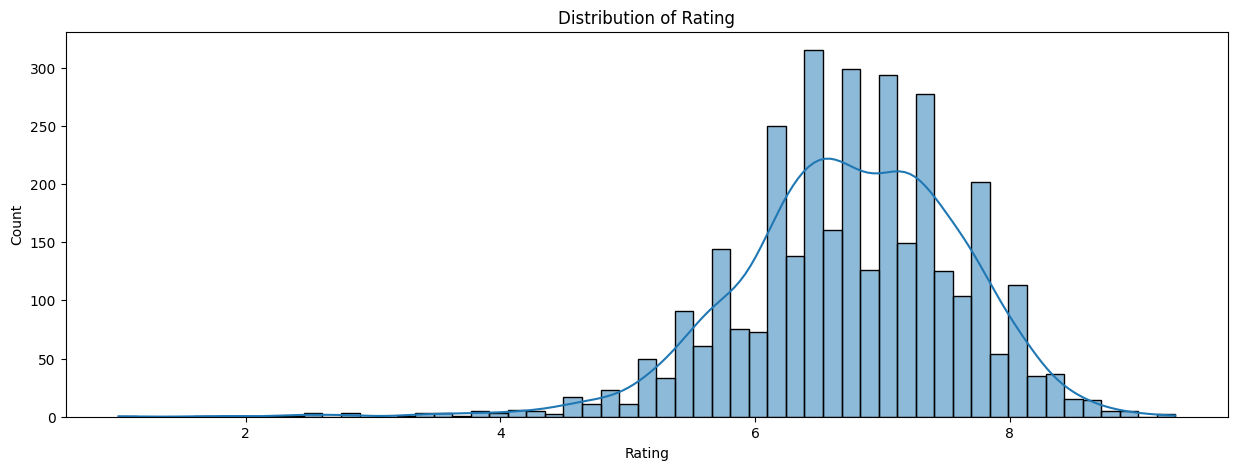

In [62]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<center><b>Figure 9.</b>- Distribution of Rating</center>

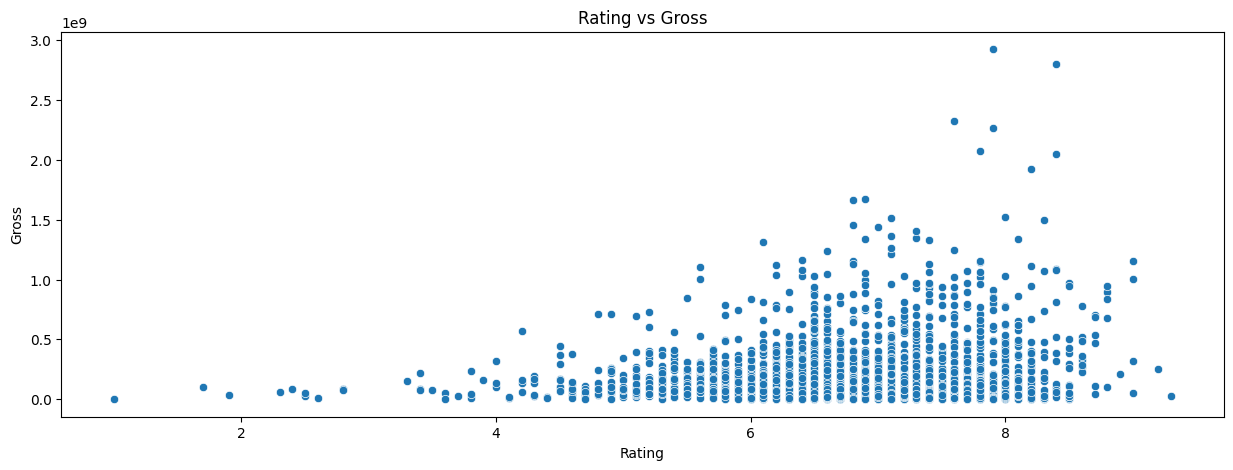

In [61]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='Rating', y='Gross')
plt.title('Rating vs Gross')
plt.xlabel('Rating')
plt.ylabel('Gross')
plt.show()

<center><b>Figure 10.</b>- Rating VS Gross</center>

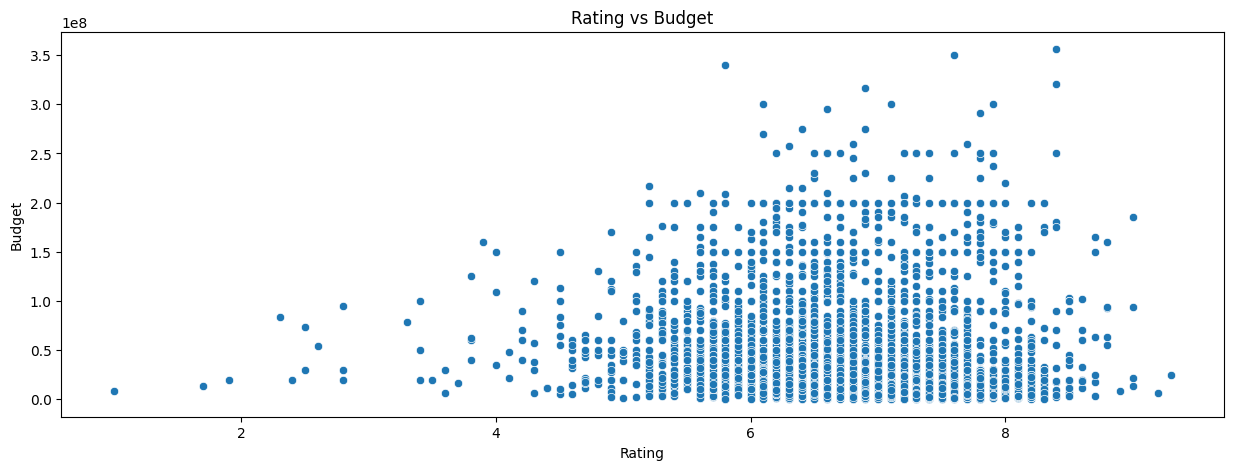

In [63]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='Rating', y='Budget')
plt.title('Rating vs Budget')
plt.xlabel('Rating')
plt.ylabel('Budget')
plt.show()

<center><b>Figure 11.</b>- Budget VS Rating</center>

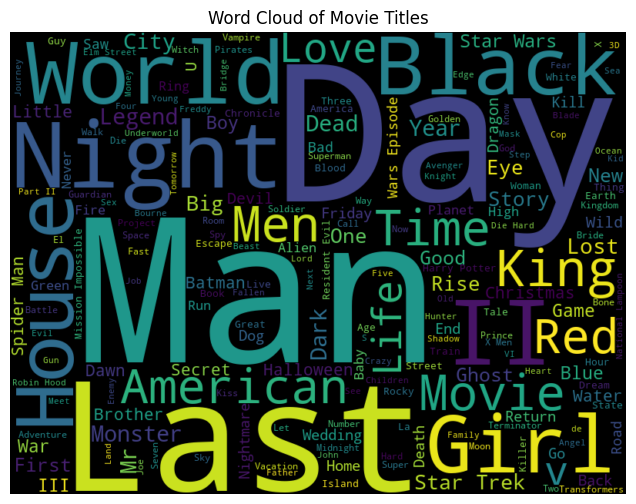

In [82]:

titles = " ".join(df["Primary Title"] + " " + df["Original Title"])
wordcloud = WordCloud(width=800, height=600).generate(titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Titles")
plt.show()

<center><b>Figure 12.</b>- Word use for Movie Titles</center>